## Test equality of means, two samples (common variance)

### Simulate data

[1] 0.5529764

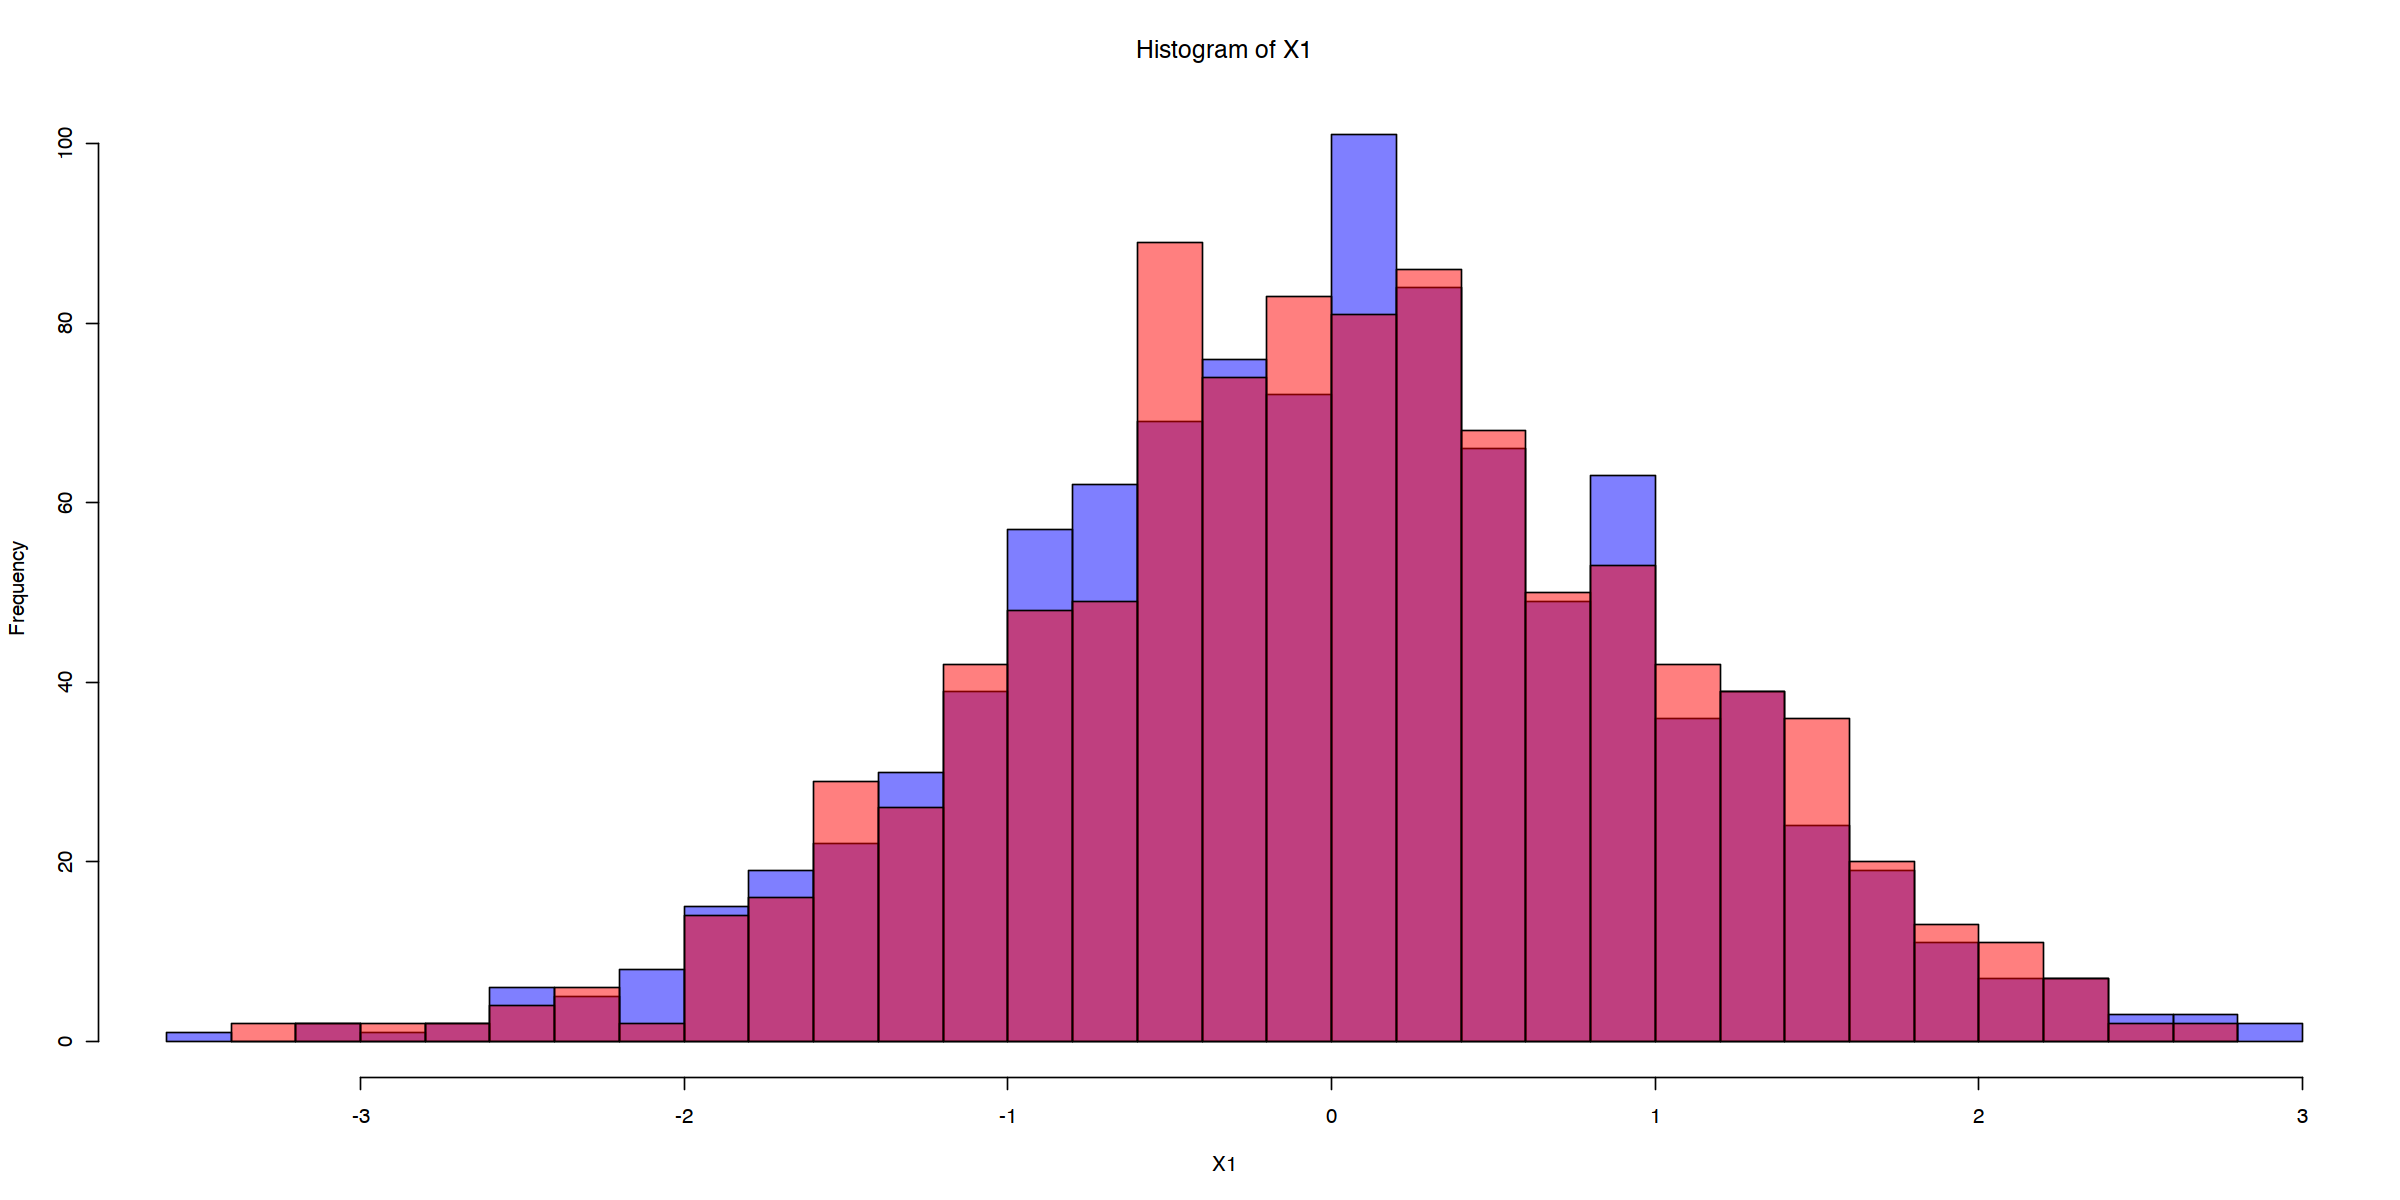

In [110]:
# Define true values for simulation
mean1 = 0.0; sd1 = 1.0;
mean2 = 0.05; sd2 = 1.0;

N = 1000;

# Sample random variates
X1 = rnorm( n=N, mean=mean1, sd=sd1 );
X2 = rnorm( n=N, mean=mean2, sd=sd2 );

# Plot
hist(X1, col=rgb(0,0,1,0.5), n=40, xlim=c( min(c(X1,X2)), max(c(X1,X2))) ); 
hist(X2, col=rgb(1,0,0,0.5), n=40, add=T);

# Maximum likelihood parameter estimates are easy for Gaussian random variables
muHat0 = mean( c(X1, X2) );
muHat1 = mean( X1 );
muHat2 = mean( X2 );

# Assume equal variances
sdHat0 = sdHat1 = sdHat2 = 1;

# Compute likelihood values
# Likelihood: P( data | parameters )
# Bayesian posterior P: P( parameters | data ), prior P

# AND = multiply
# OR  = add
# L_null = product( dnorm( c(X1,X2), mean=muHat0, sd=sdHat0, log=F));
logL_null = sum(dnorm( c(X1,X2), mean=muHat0, sd=sdHat0, log=T));
logL_alt  = sum(dnorm( X1, mean=muHat1, sd=sdHat1, log=T)) + sum(dnorm( X2, mean=muHat2, sd=sdHat2, log=T));

# Compute likelihood ratio statistic
LR = -2 * ( logL_null - logL_alt )
LR

## Likelihood ratio test

### Two-sided test, one-tailed distribution

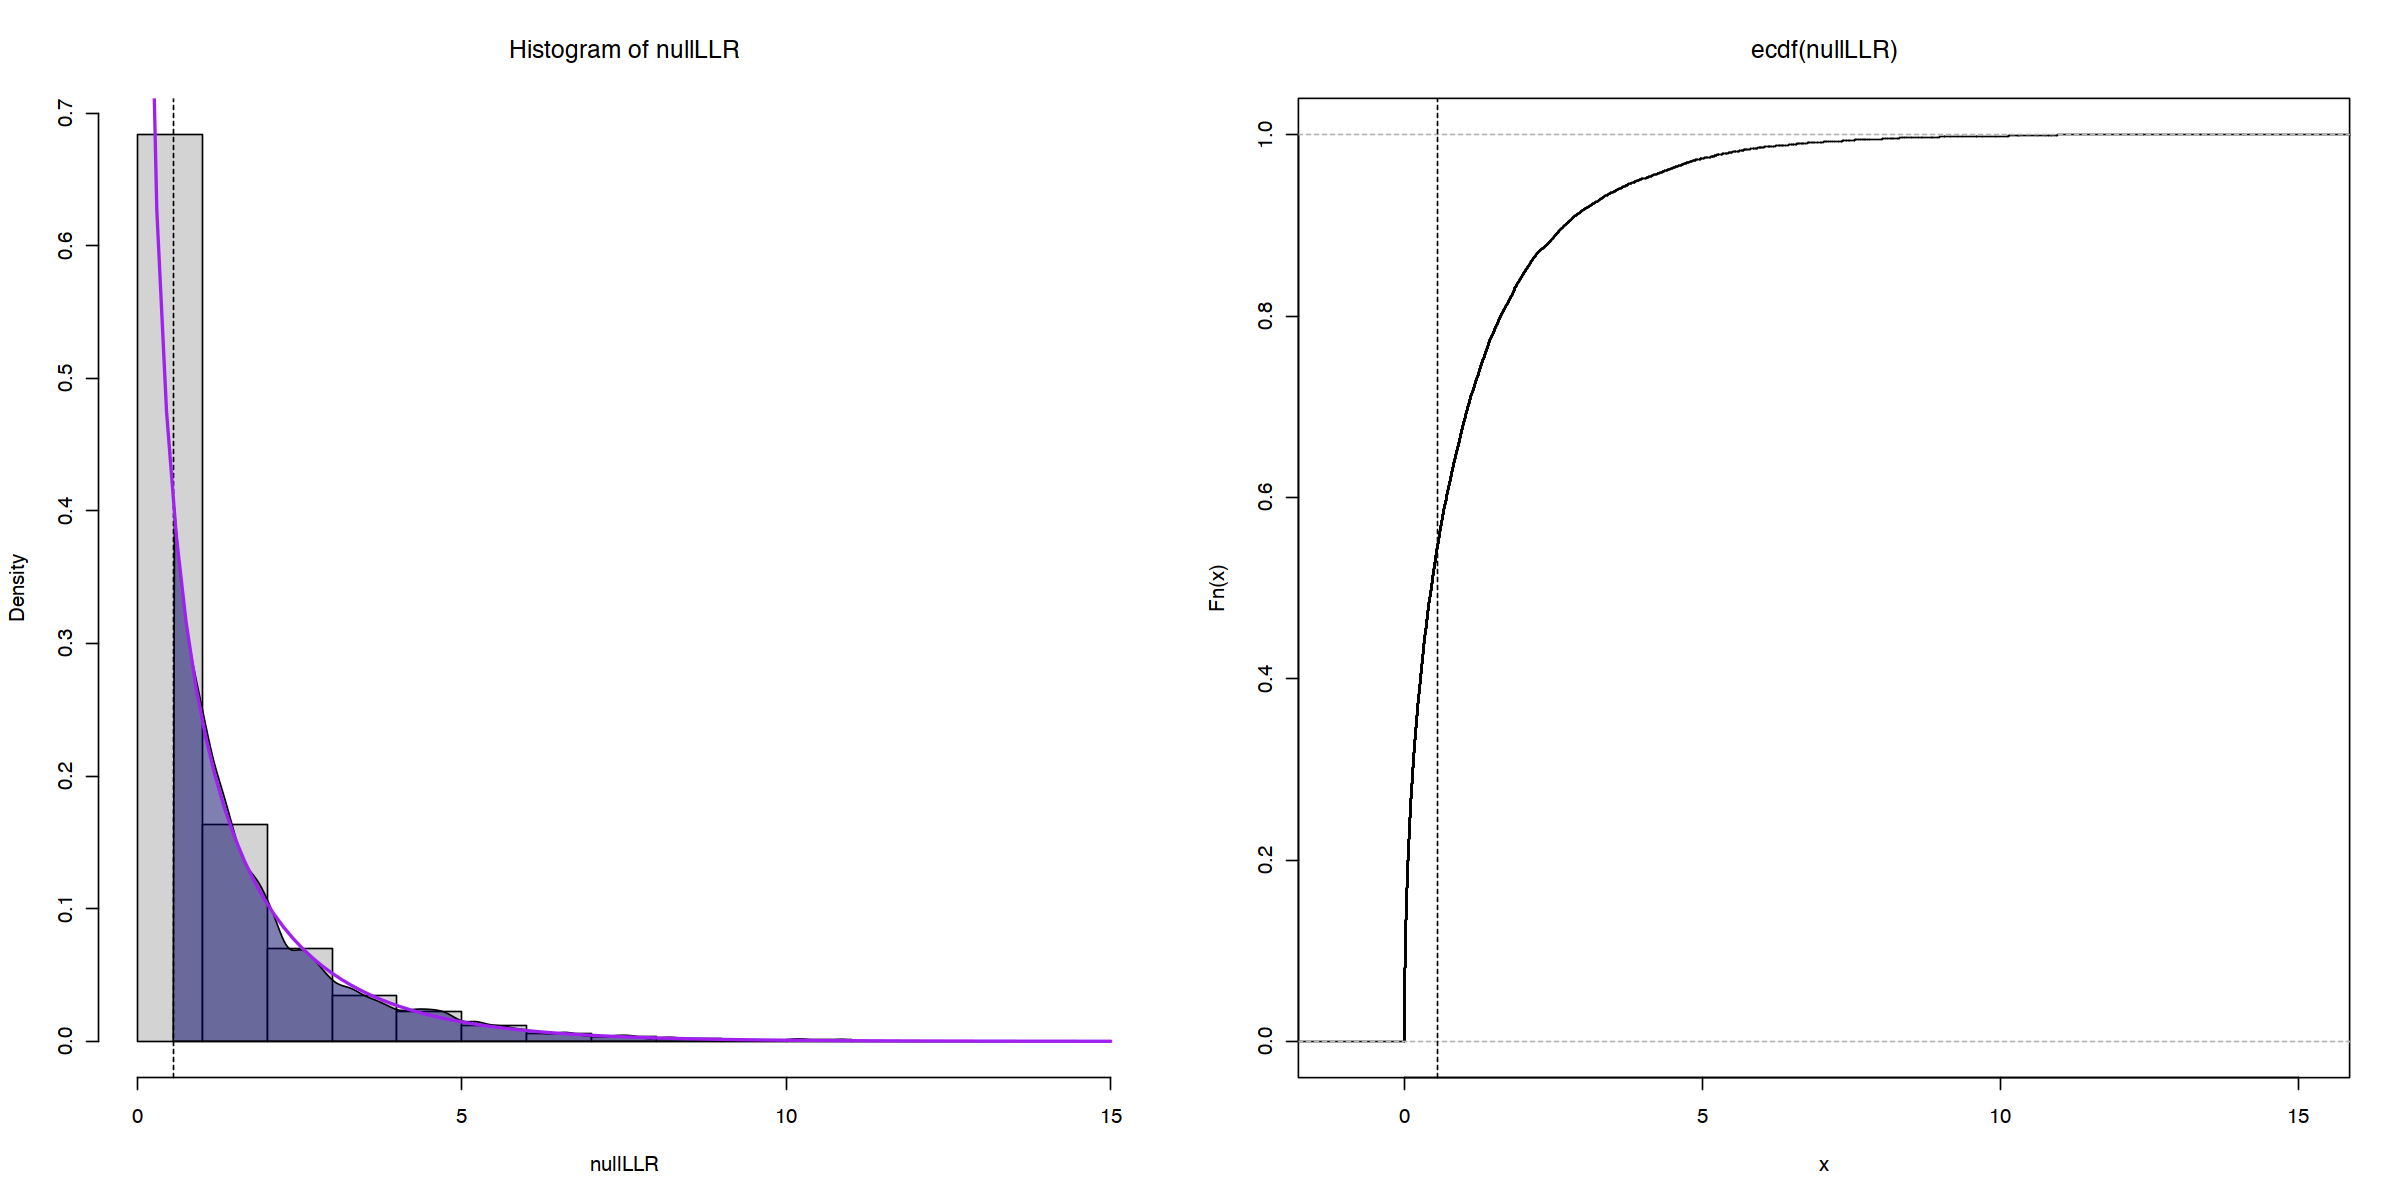

In [113]:
# Simulate null LR distribution

numReps = 10000;

nullLLR=0;

for (i in 1:numReps) {
    # Simulate LRs under null hypothesis
    X1null = rnorm( n=N, mean=muHat0, sd=sdHat0 );
    X2null = rnorm( n=N, mean=muHat0, sd=sdHat0 );

    muHatn0 = mean( c(X1null, X2null) );
    muHatn1 = mean( X1null );
    muHatn2 = mean( X2null );
    
    # Assume equal variances
    sdHatn0 = sdHatn1 = sdHatn2 = 1;
    
    # Compute likelihood values
    logLn_null = sum(dnorm( c(X1null,X2null), mean=muHatn0, sd=sdHatn0, log=T));
    logLn_alt  = sum(dnorm( X1null, mean=muHatn1, sd=sdHatn1, log=T)) + sum(dnorm( X2null, mean=muHatn2, sd=sdHatn2, log=T));

    nullLLR[i] = -2 * (logLn_null - logLn_alt);
}

# Plot ePDF and eCDF side by side
par(mfrow=c(1,2))
options(repr.plot.width=20, repr.plot.height=10)
hist( nullLLR, n=20, prob=T )

# Plot observed LR
abline(v=LR, lty='dashed')

# Get kernel density for integration purposes
d = density( nullLLR );
polygon( c(d$x[d$x > LR], LR), c(d$y[d$x > LR],0), col=rgb(0,0,0.4,0.5) );

# Plot asymptotic distribution of LR statistic
curve( dchisq(x, df=1), lwd=2, col='purple', add=TRUE)

# ECDF
plot(ecdf(nullLLR));
abline(v = LR, lty='dashed')
e = ecdf( nullLLR );

In [115]:
# 1) Compute P-value from distribution
length( (nullLLR[ nullLLR > LR])) / length(nullLLR)

# 2) Alternative approach: use empirica|
1-cdf(LR)

# 3) Use asymptotic P-value (chi-sq distributed with df=# diff free parameters)
pchisq(LR, df=1, ncp = 0, lower.tail = FALSE)

[1] 0.4536

[1] 0.4605

[1] 0.4571041

### One-sided tests, one-tailed distributions

In [118]:
library(BB);

# One-sided LRT (mu2 > mu1, mu1 known)

lnl <- function( mx, data1, data2 ) {
    # Assume mean of X1 is known (true value)
    # Compute likelihood as a function of muHat1
    result = sum(dnorm( data1, mean=mean1, sd=1, log=T)) + sum(dnorm( data2, mean=mx, sd=1, log=T));
    return(result);
}

# Numerically maximize likelihood wrt mean2 with constraint
result = spg( c(5), lnl, lower=mean1, upper=1000, control=list(maximize=TRUE), data1=X1, data2=X2);

# Print MLE and lnL from spg optimizer
cat(sprintf("\nMLE: %f (true value: %f), lnL: %f\n", result$par, mean2, result$value))

logL_null = sum(dnorm( c(X1,X2), mean=muHat0, sd=1, log=T));
logL_alt = result$value;

LR = -2 * (logL_null - logL_alt)
P = pchisq(LR, df=1, ncp = 0, lower.tail = FALSE)
cat(sprintf("LRT: %f, P-value (asymptotic): %f\n", LR, P))


iter:  0  f-value:  -15204.79  pgrad:  5 

MLE: 0.026017 (true value: 0.050000), lnL: -2834.542189
LRT: 0.500579, P-value (asymptotic): 0.479246


In [119]:
library(BB);

# One-sided LRT (mu2 <= mu1, mu1 known)

lnl <- function( mx, data1, data2 ) {
    # Assume mean of X1 is known (true value)
    # Compute likelihood as a function of muHat1
    result = sum(dnorm( data1, mean=mean1, sd=1, log=T)) + sum(dnorm( data2, mean=mx, sd=1, log=T));
    return(result);
}

# Numerically maximize likelihood wrt mean2 with constraint
result = spg( c(5), lnl, lower=-1000, upper=mean1, control=list(maximize=TRUE), data1=X1, data2=X2);

# Print MLE and lnL from spg optimizer
cat(sprintf("\nMLE: %f (true value: %f), lnL: %f\n", result$par, mean2, result$value))

logL_null = sum(dnorm( c(X1,X2), mean=muHat0, sd=1, log=T));
logL_alt = result$value;

LR = -2 * (logL_null - logL_alt)
P = pchisq(LR, df=1, ncp = 0, lower.tail = FALSE)
cat(sprintf("LRT: %f, P-value (asymptotic): %f\n", LR, P))



iter:  0  f-value:  -15204.79  pgrad:  0 


Warning message in spg(c(5), lnl, lower = -1000, upper = mean1, control = list(maximize = TRUE), :
“convergence tolerance satisified at intial parameter values.”



MLE: 0.000000 (true value: 0.050000), lnL: -15204.794462
LRT: -24740.003969, P-value (asymptotic): 1.000000


## T-test

### Two-sided test, two-tailed distribution

[1] -1.666719

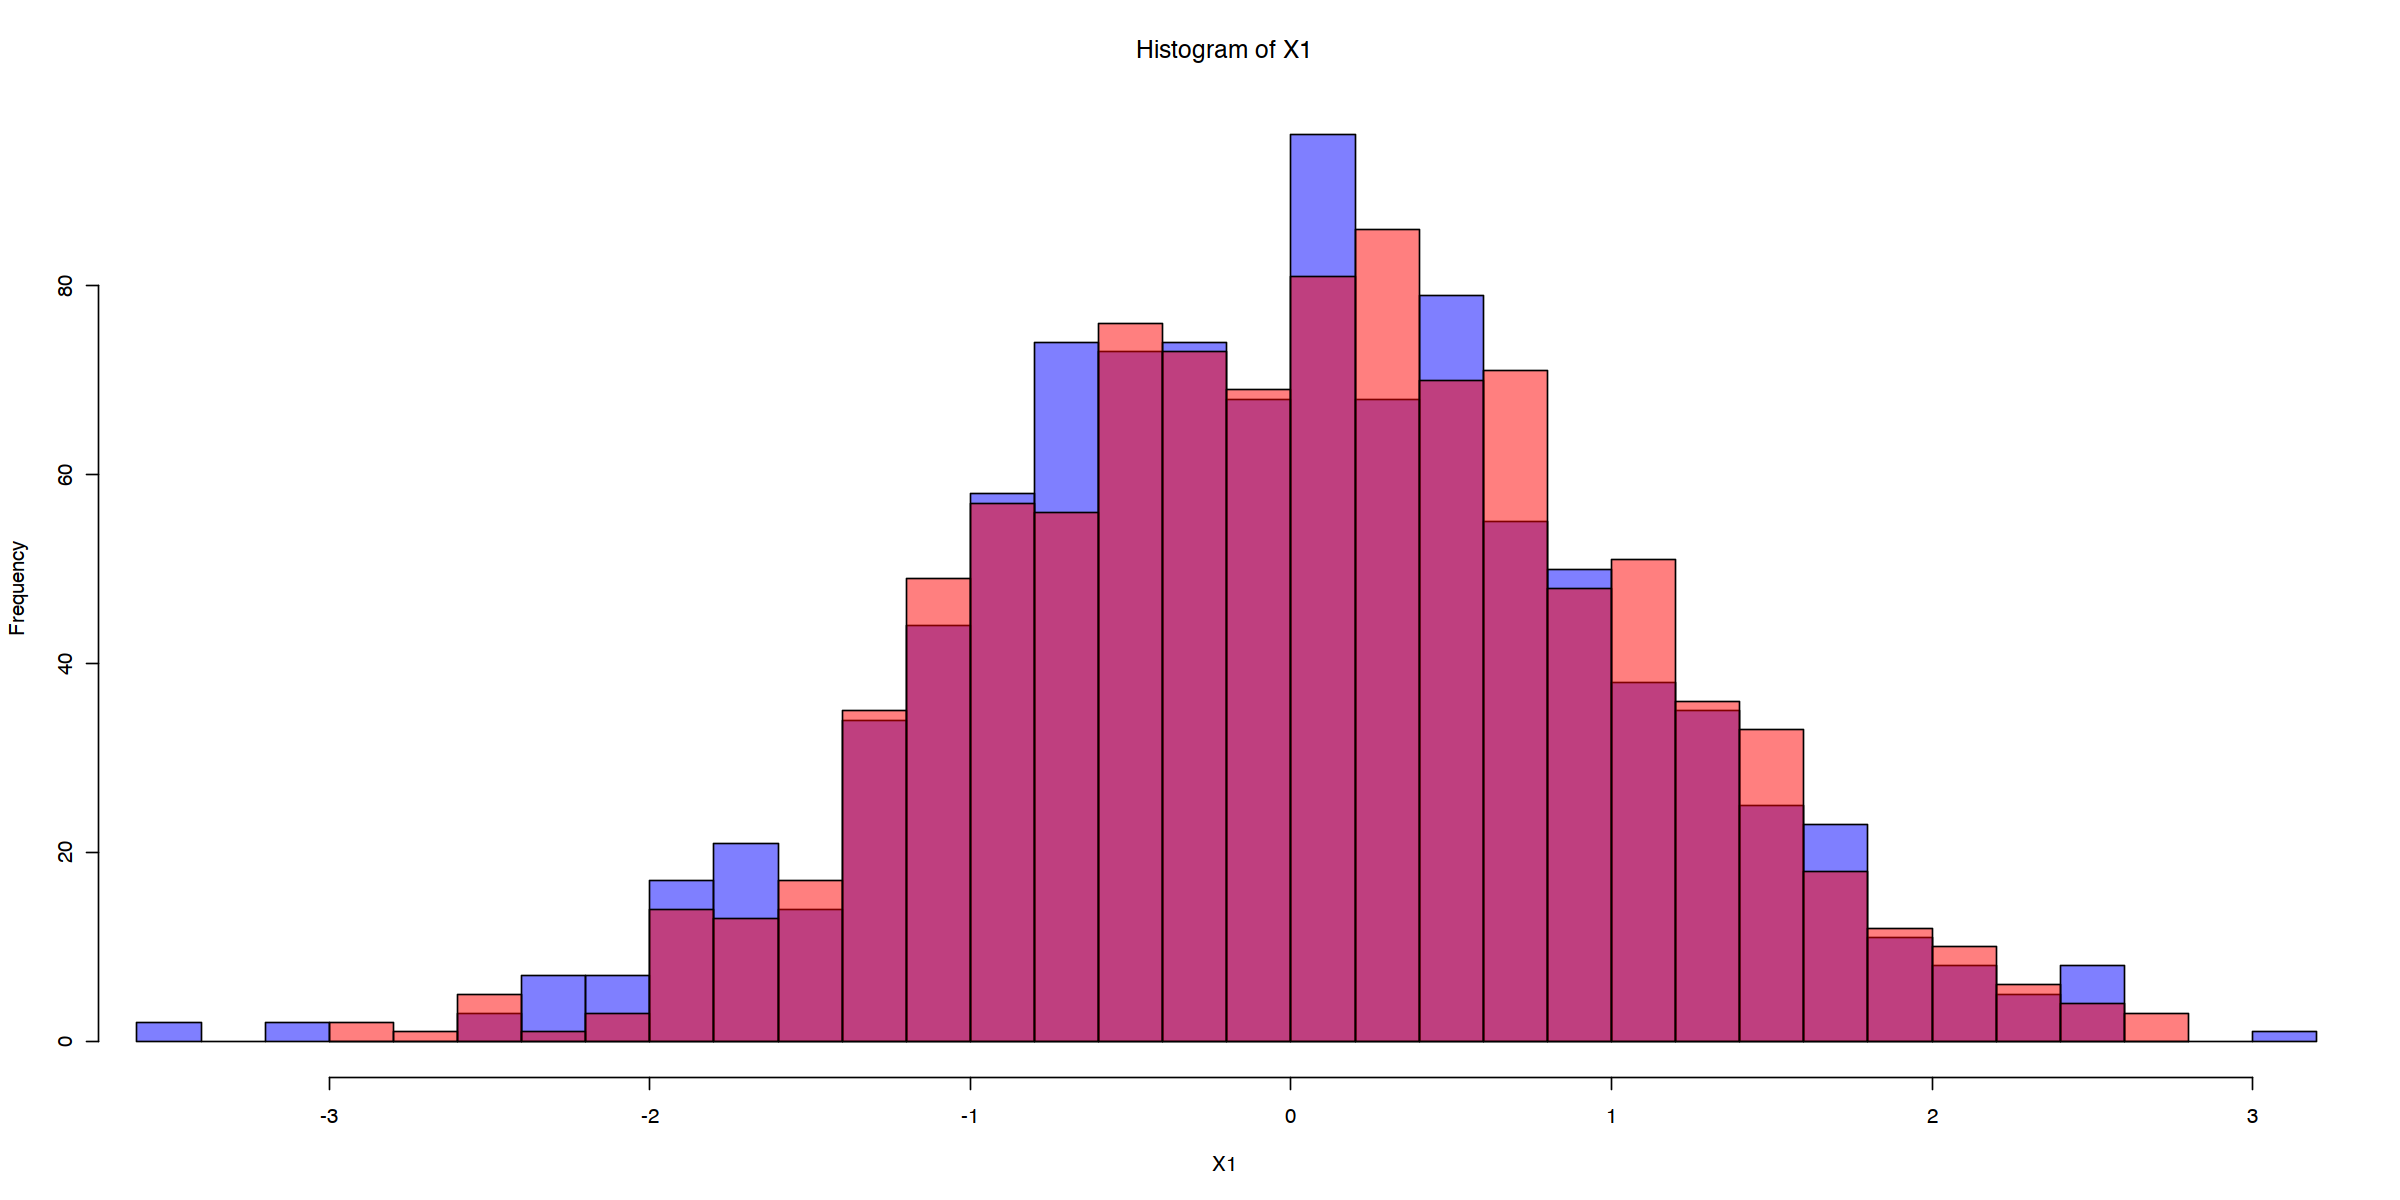

In [91]:
# Plot
hist(X1, col=rgb(0,0,1,0.5), n=40, xlim=c( min(c(X1,X2)), max(c(X1,X2))) ); 
hist(X2, col=rgb(1,0,0,0.5), n=40, add=T);

# Compute t statistic for equal sample size and variance
sp = sqrt( ( sd(X1)^2 + sd(X2)^2 ) / 2 );
tObserved=(mean(X1) - mean(X2)) / ( sp * sqrt(2/N) );

tObserved

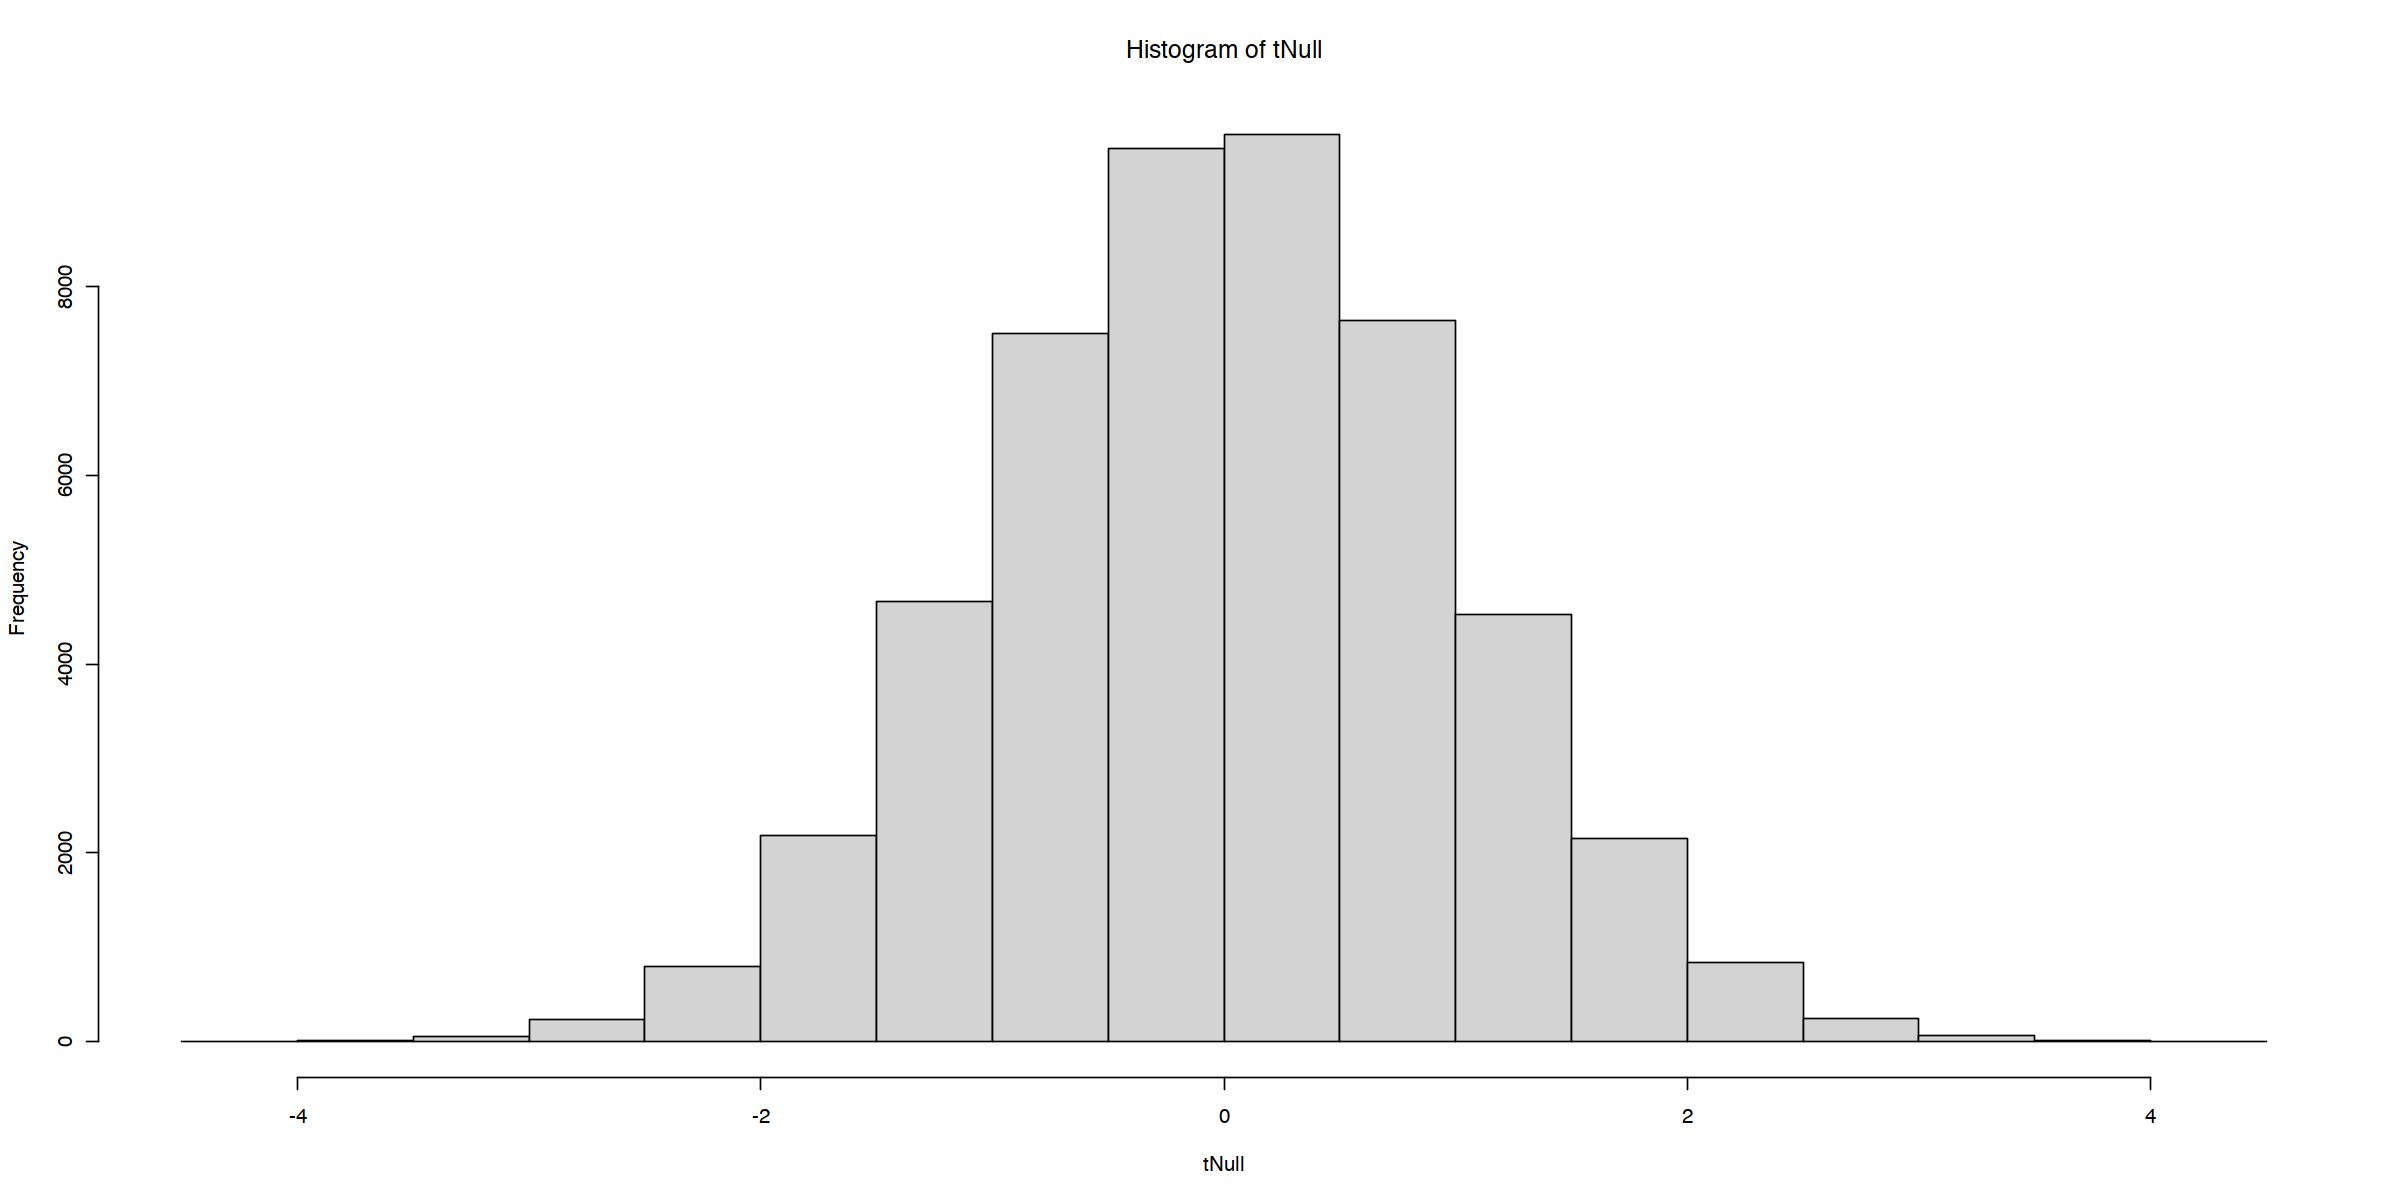

In [92]:
# Now simulate null distribution
numReps = 50000;

tNull=0;

for (i in 1:numReps) {
    # Simulate LRs under null hypothesis
    X1null = rnorm( n=N, mean=muHat0, sd=sdHat0 );
    X2null = rnorm( n=N, mean=muHat0, sd=sdHat0 );

    # Compute t-statistic values
    spnull = sqrt( ( sd(X1null)^2 + sd(X2null)^2 ) / 2 );
    tNull[i]=(mean(X1null) - mean(X2null)) / ( spnull * sqrt(2/N) );
}

hist(tNull)

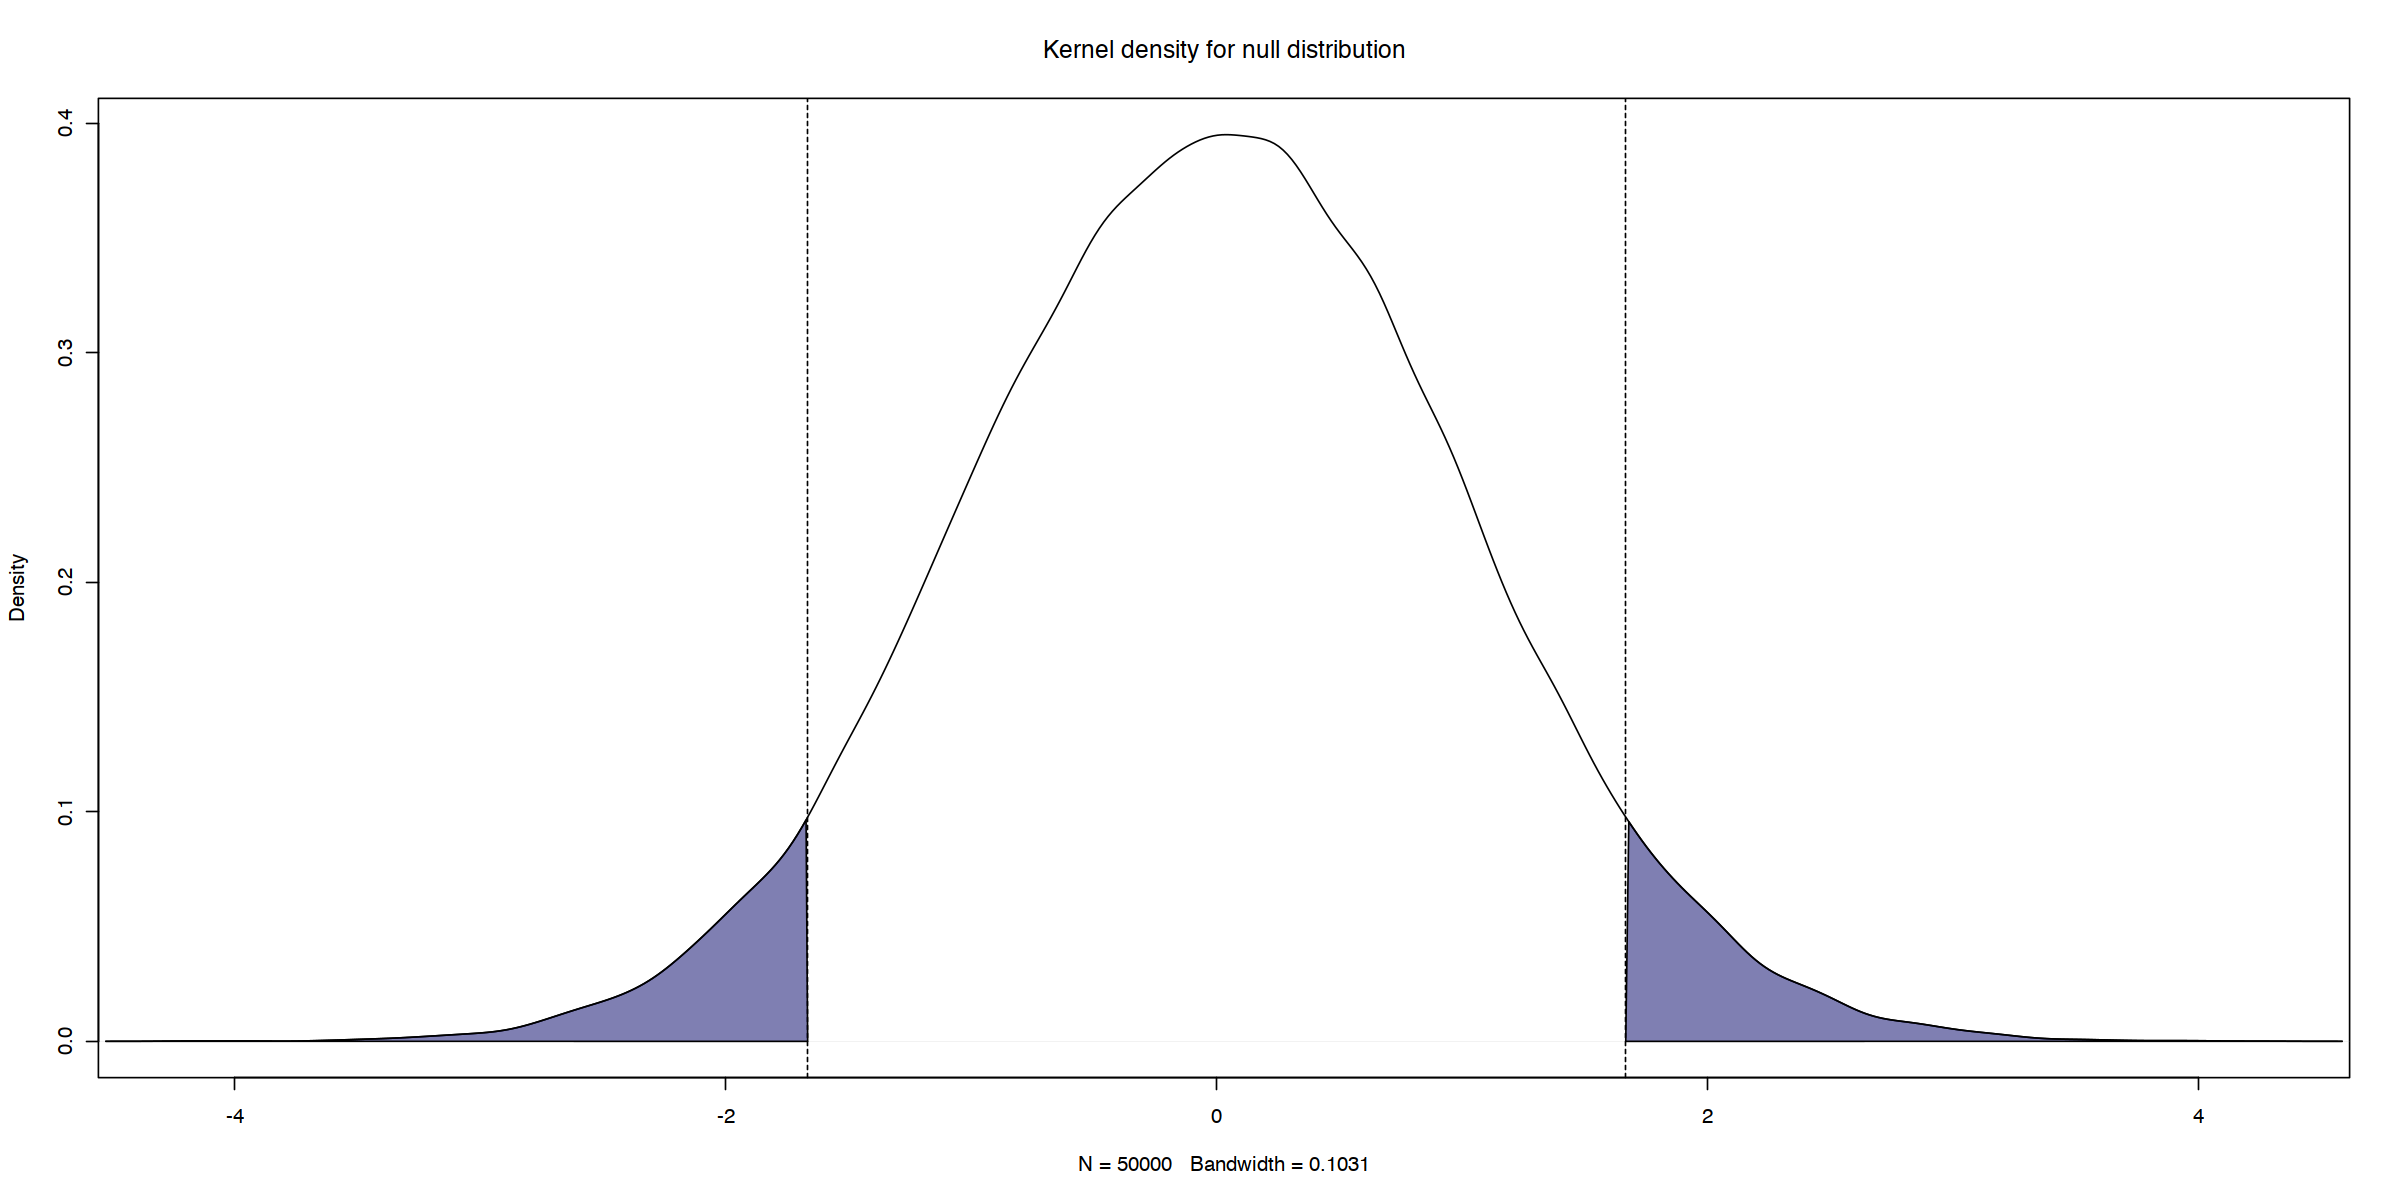

In [93]:
# Plot null distribution
d = density( tNull );
plot( d, xlim=c(min(c( tNull, tObserved )), max(c( tNull, tObserved ) ) ), main="Kernel density for null distribution" );

# Plot the area to the left of the observed value
abline(v=tObserved, lty='dashed');
polygon( c(d$x[d$x <= tObserved],tObserved), c(d$y[d$x <= tObserved],0), col=rgb(0,0,0.4,0.5) );

# Plot the area to the right of minus the observed value
abline(v=-tObserved, lty='dashed');
polygon( c(d$x[d$x > -tObserved],-tObserved), c(d$y[d$x > -tObserved],0), col=rgb(0,0,0.4,0.5) );

## One-sided, one-tailed

In [120]:
df=2*N-2;

# One-sided
P1= pt( tObserved, df=df, lower=TRUE )

# Two-sided
P2 = pt( tObserved, df=df, lower=TRUE ) + pt( -tObserved, df=df, lower=FALSE )

c(P1, P2)

# One-sided from simulation
P1sim = (length(tNull[ tNull <= tObserved]) ) / length(tNull);

# Two-sided from simulation
P2sim = (length(tNull[ tNull <= tObserved]) + length(tNull[ tNull > -tObserved]) ) / length(tNull);

c(P1sim, P2sim)

[1] 0.04786353 0.09572706

[1] 0.04616 0.09400

In [96]:
# Check against R's t-test implementation
t.test(x=X1,y=X2,alternative="less", var.equal=T); 
t.test(x=X1,y=X2,alternative="two.sided", var.equal=T);


	Two Sample t-test

data:  X1 and X2
t = -1.6667, df = 1998, p-value = 0.04786
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
          -Inf -0.0009237301
sample estimates:
  mean of x   mean of y 
-0.01198661  0.06097252 



	Two Sample t-test

data:  X1 and X2
t = -1.6667, df = 1998, p-value = 0.09573
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.15880681  0.01288855
sample estimates:
  mean of x   mean of y 
-0.01198661  0.06097252 


In [101]:
result=t.test(x=X1,y=X2,alternative="less", var.equal=T)
result$p.value*2

[1] 0.09572706

## Live power simulations (IN PROGRESS; stopped here)

[1] -1.872822

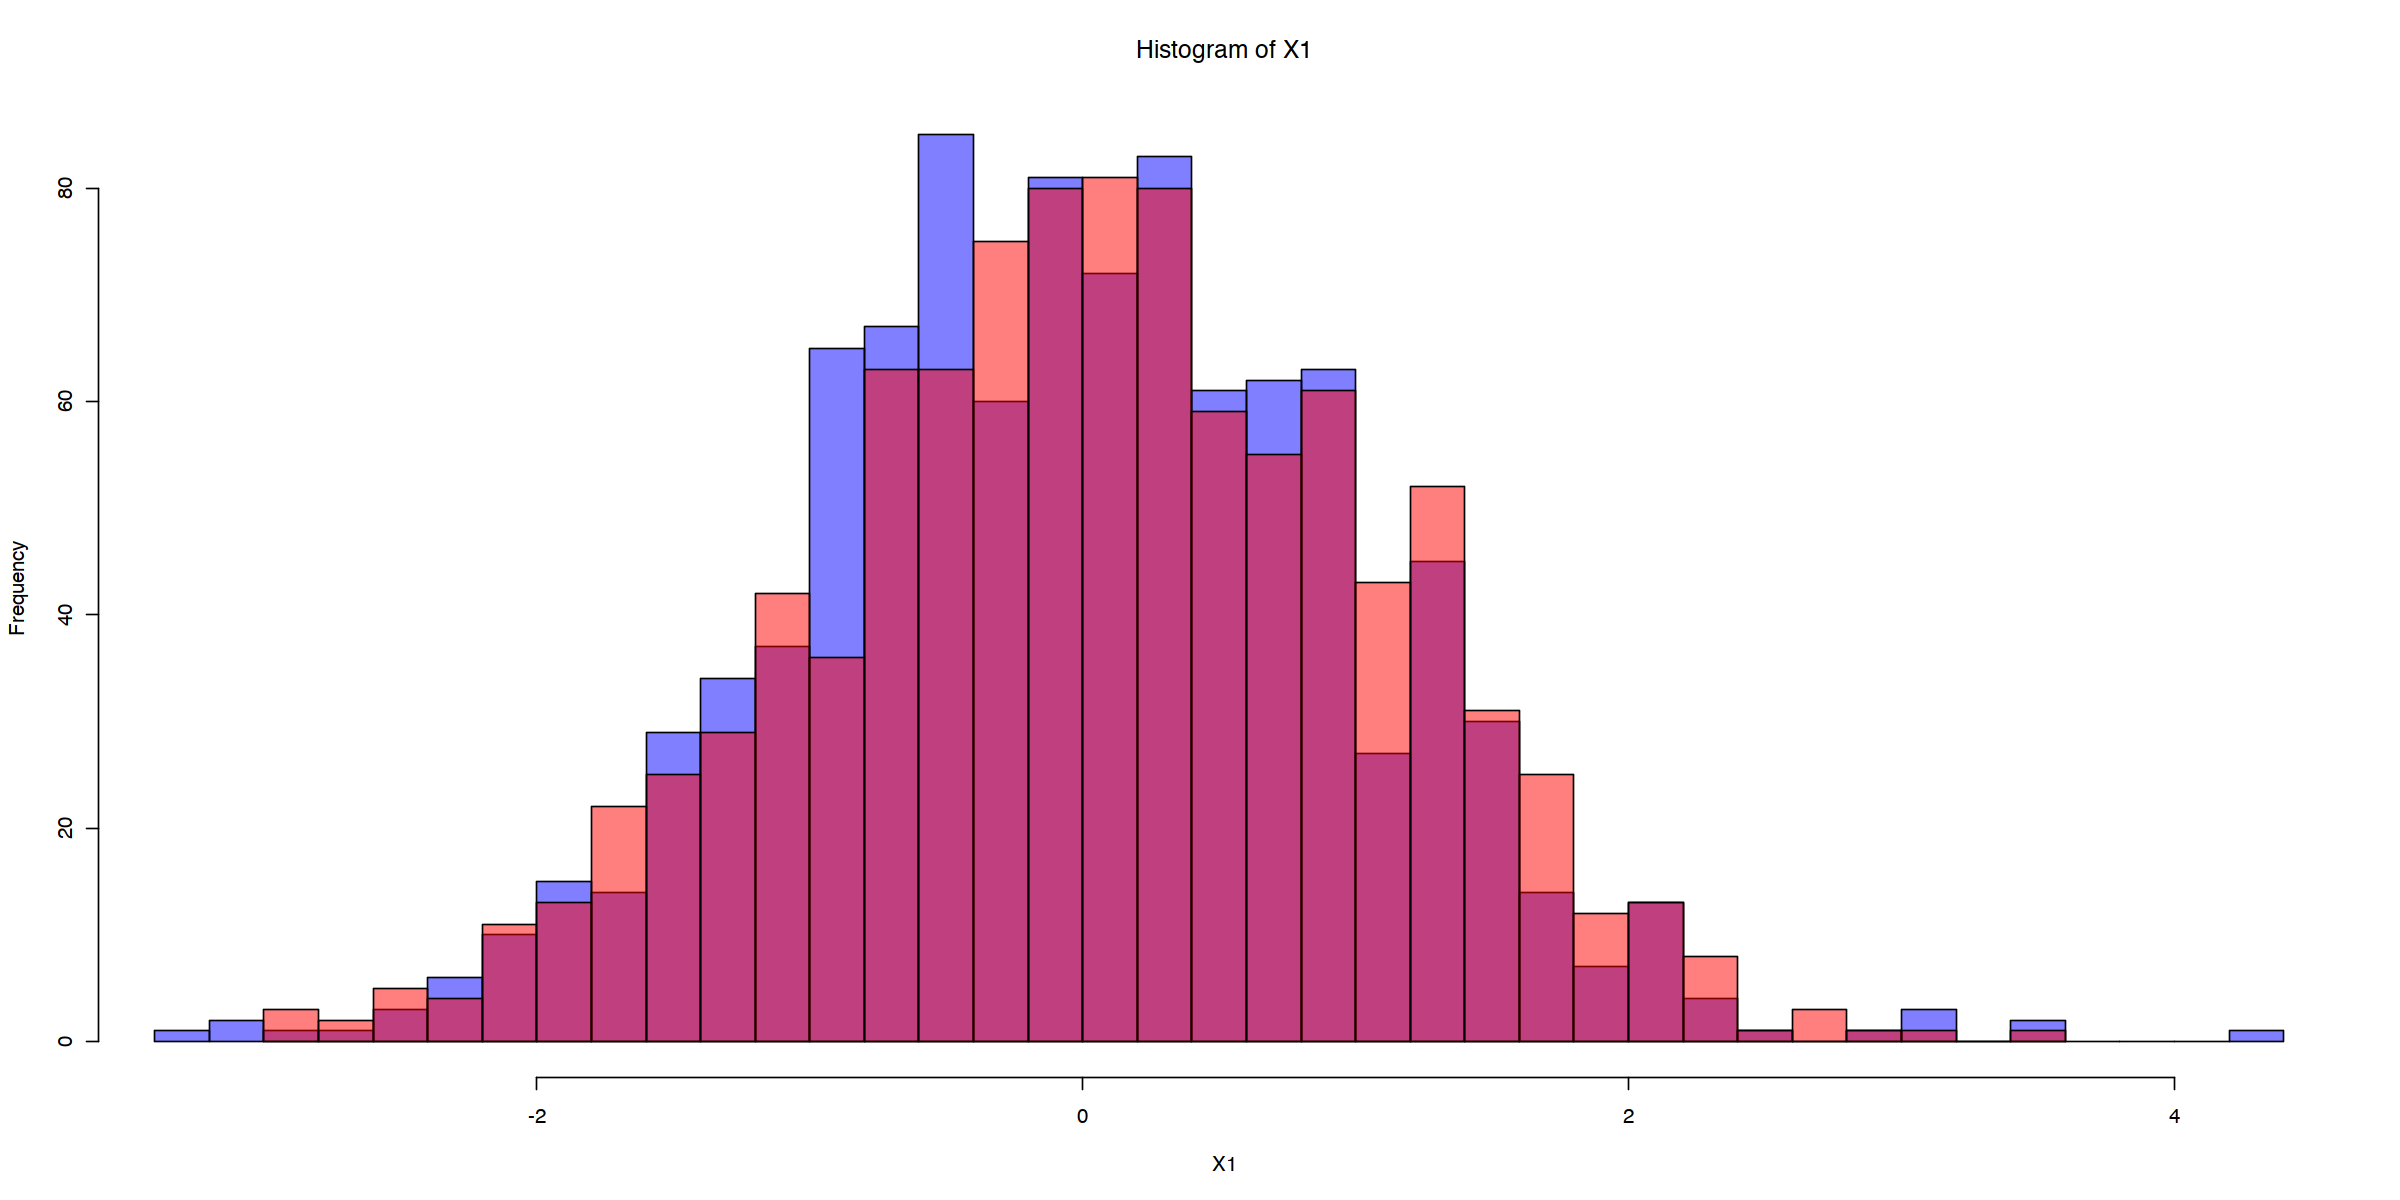

In [122]:
# Define true values for simulation
mean1 = 0.0; sd1 = 1.0;
mean2 = 0.05; sd2 = 1.0;

N = 1000;

# Sample random variates
X1 = rnorm( n=N, mean=mean1, sd=sd1 );
X2 = rnorm( n=N, mean=mean2, sd=sd2 );

# Plot
hist(X1, col=rgb(0,0,1,0.5), n=40, xlim=c( min(c(X1,X2)), max(c(X1,X2))) ); 
hist(X2, col=rgb(1,0,0,0.5), n=40, add=T);

sp = sqrt( ( sd(X1)^2 + sd(X2)^2 ) / 2 );
tObserved=(mean(X1) - mean(X2)) / ( sp * sqrt(2/N) );

tObserved

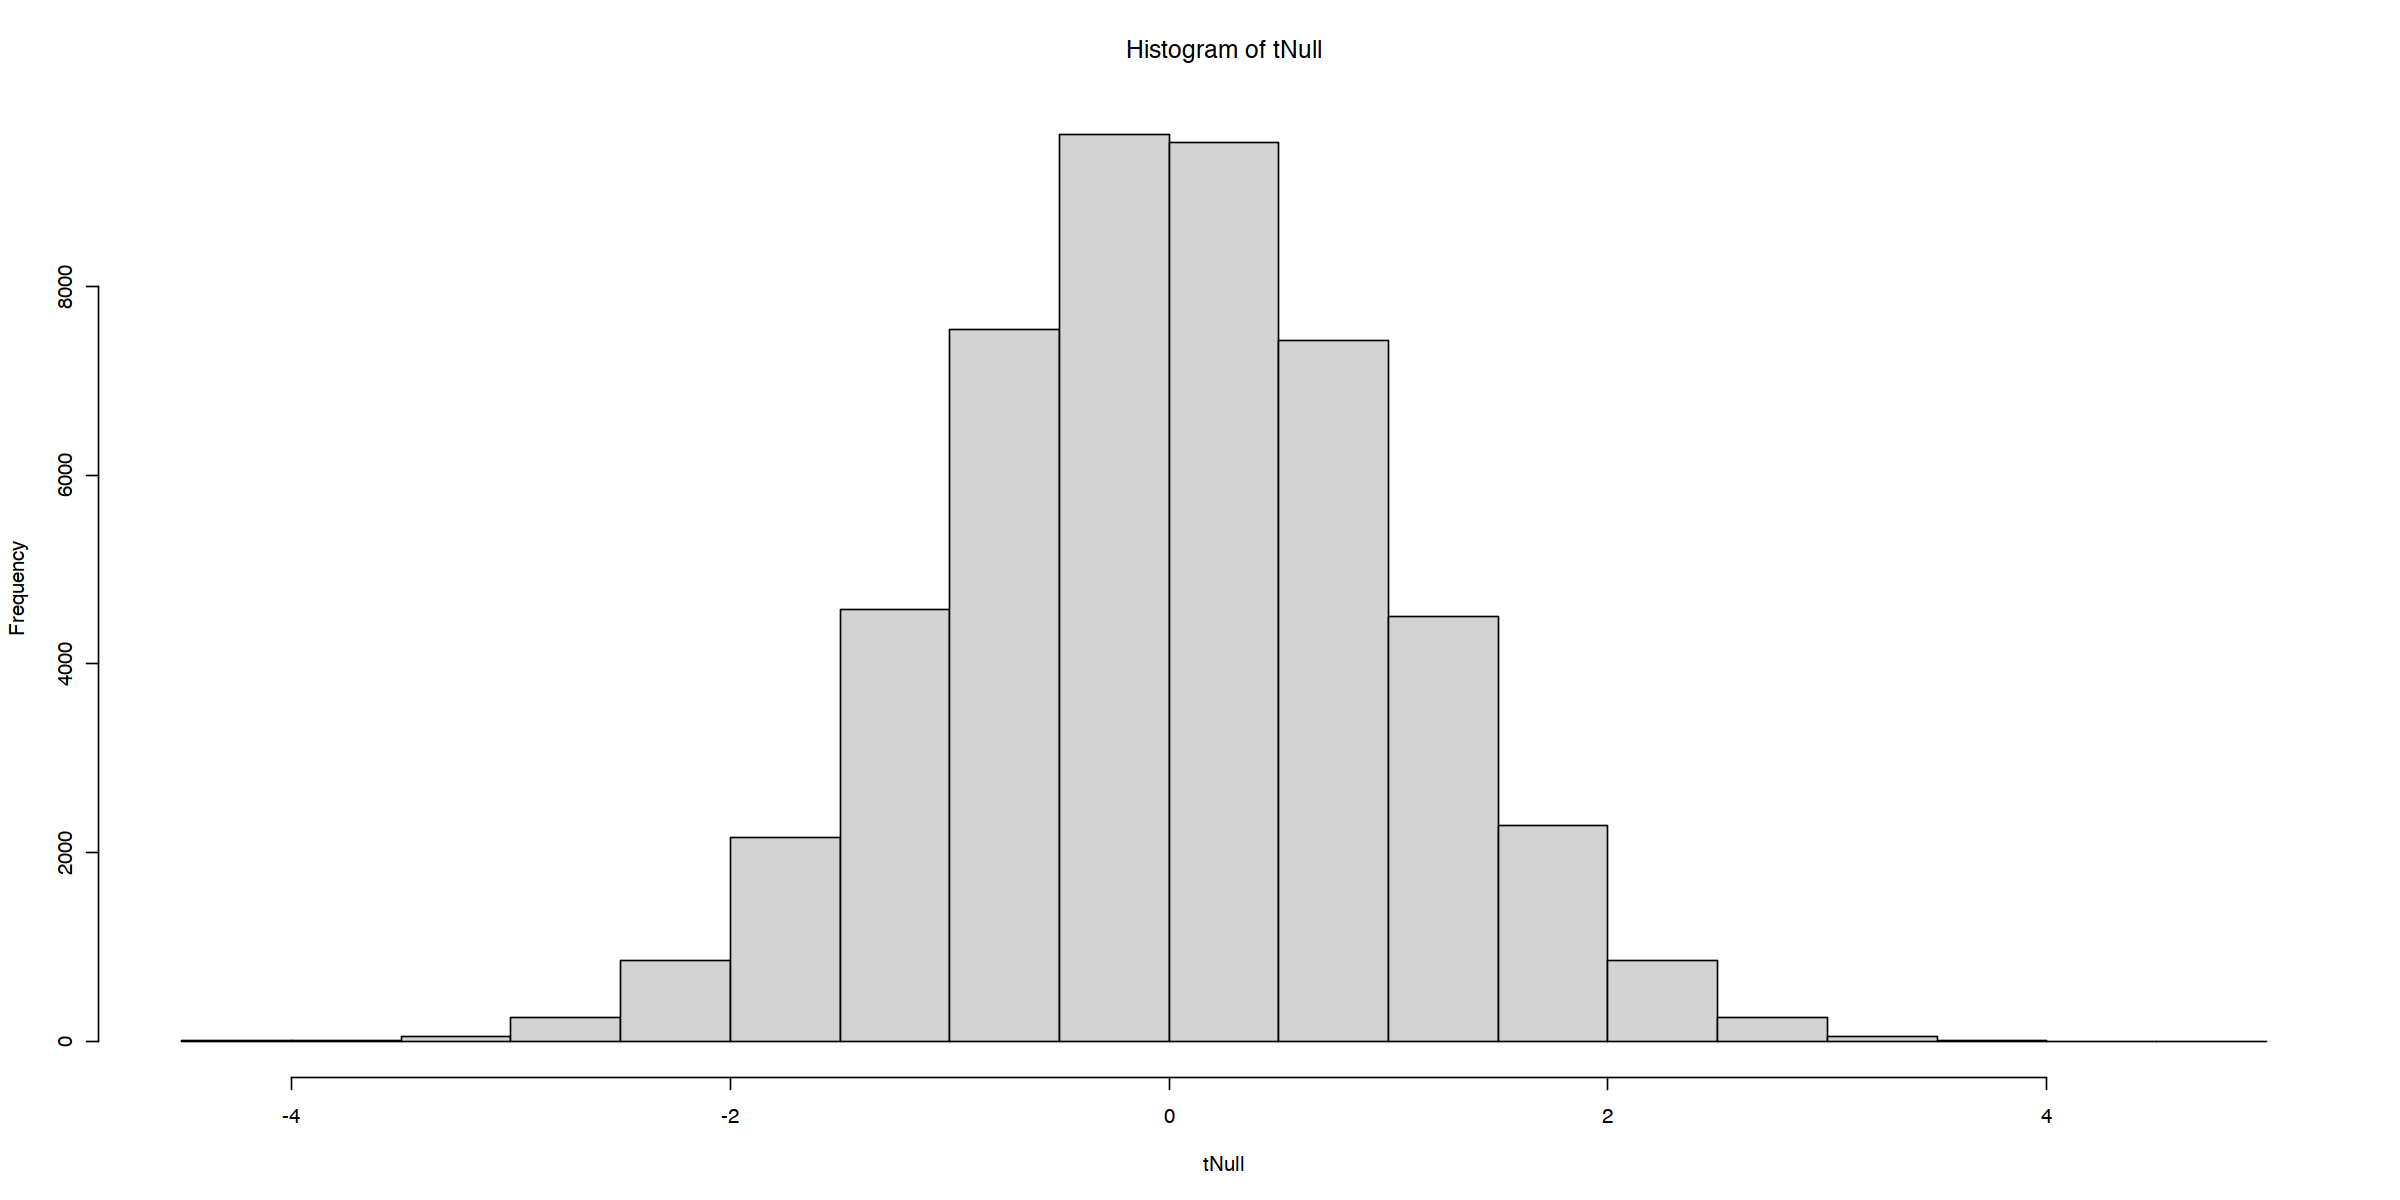

In [124]:
numReps = 50000;

tNull=0;

for (i in 1:numReps) {
    # Simulate LRs under null hypothesis
    X1null = rnorm( n=N, mean=muHat0, sd=sdHat0 );
    X2null = rnorm( n=N, mean=muHat0, sd=sdHat0 );

    # Compute t-statistic values
    spnull = sqrt( ( sd(X1null)^2 + sd(X2null)^2 ) / 2 );
    tNull[i]=(mean(X1null) - mean(X2null)) / ( spnull * sqrt(2/N) );
}

hist(tNull)

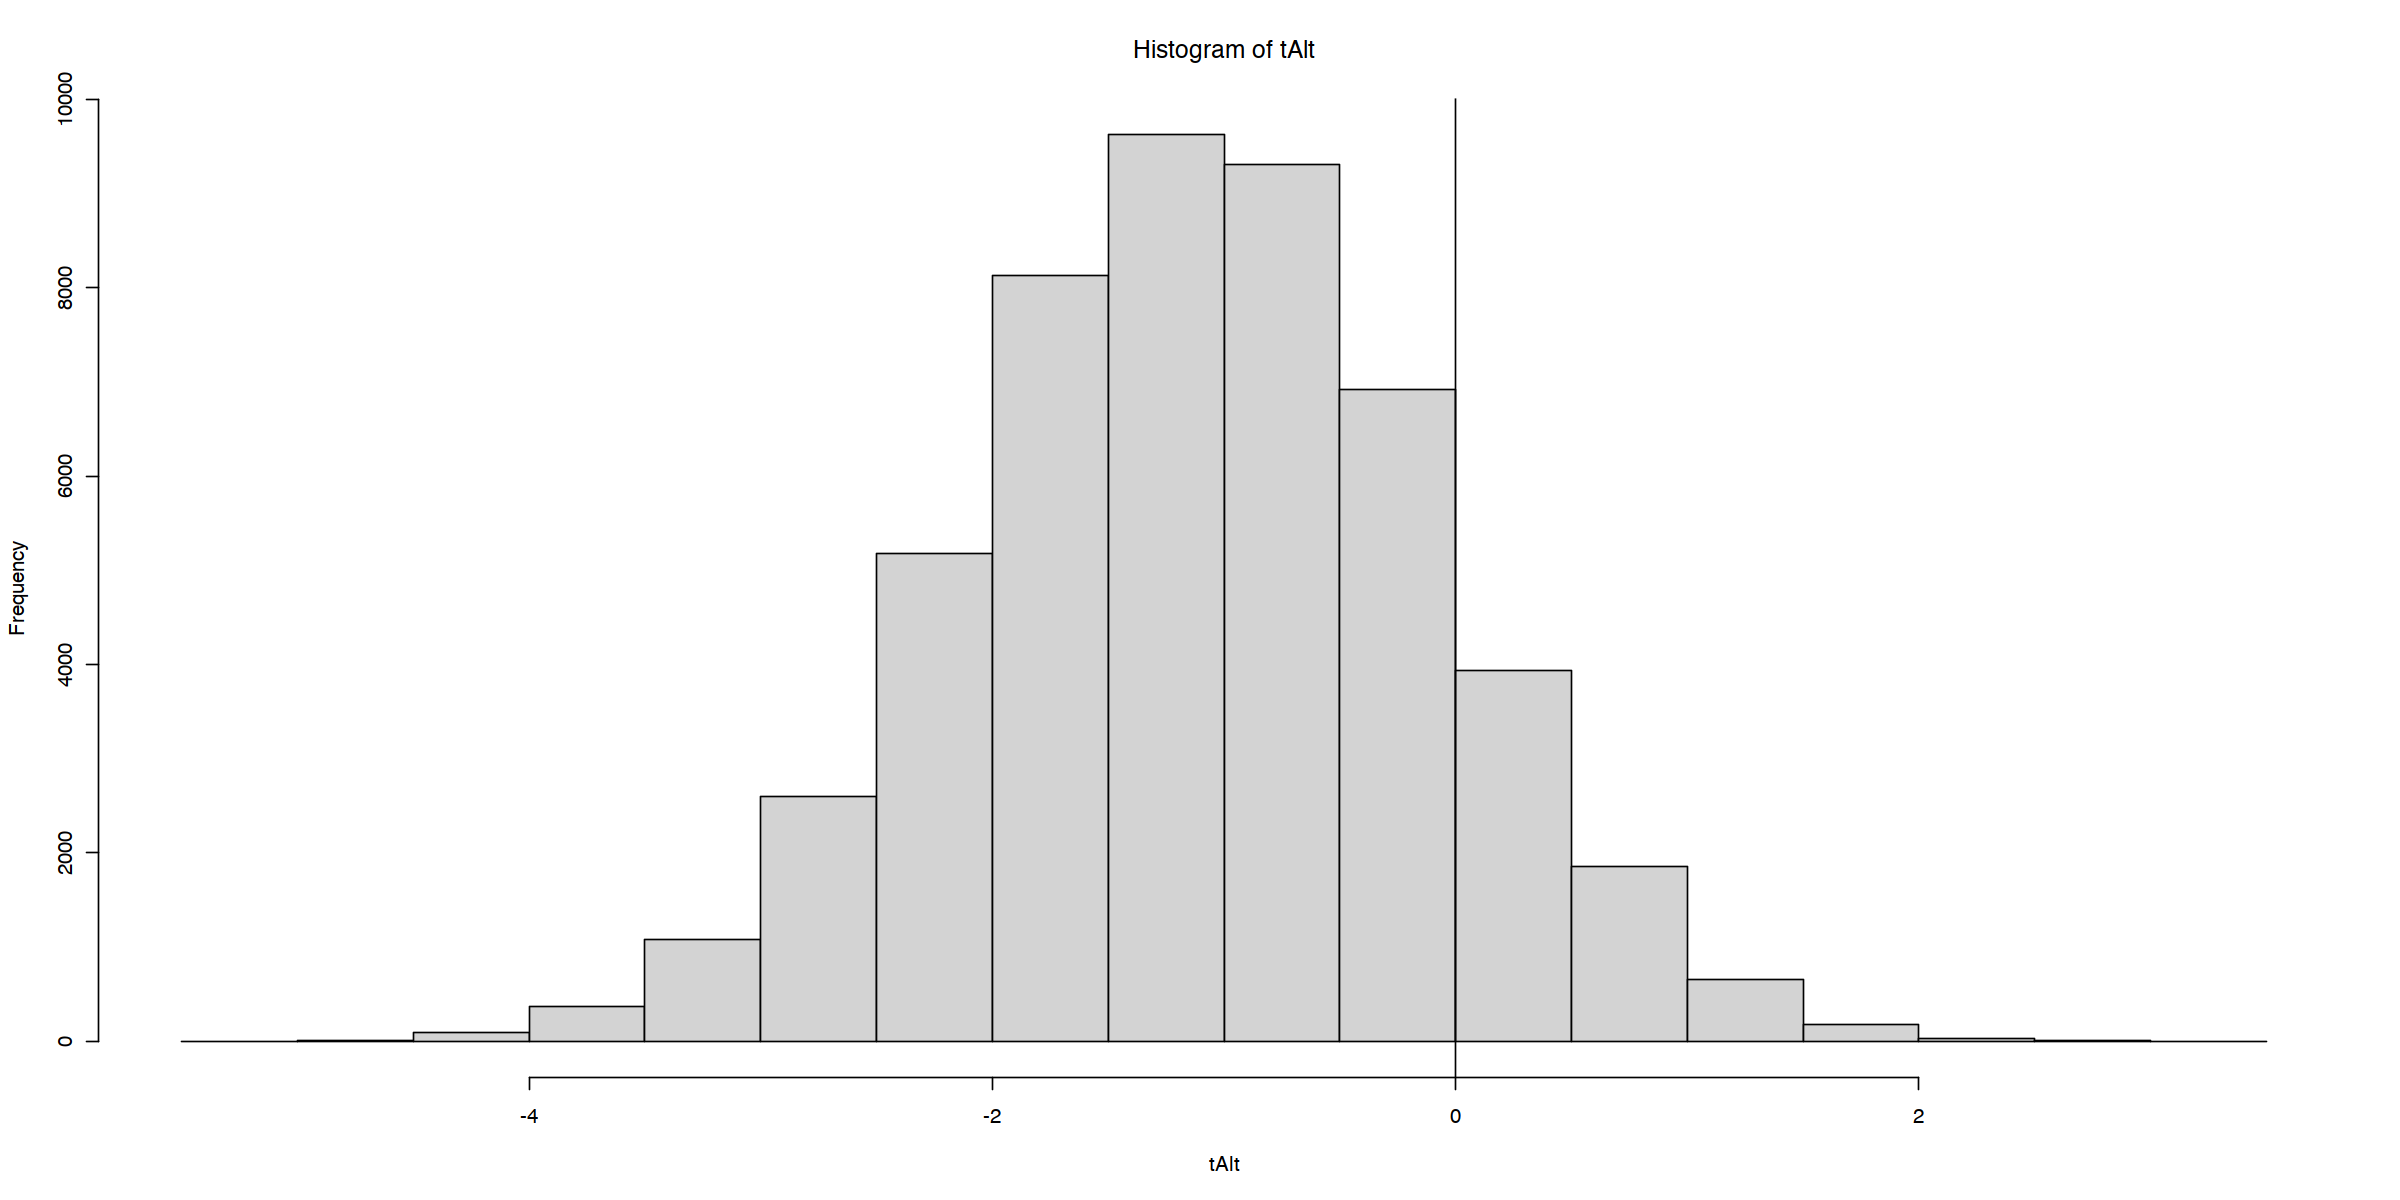

In [126]:
# Define parameters of the (true) alternative hypothesis AND experimental design
nSim=1000;
meansim1 = 0;
meansim2 = 0.05;

numReps = 50000;
tAlt=0;

for (i in 1:numReps) {
    # Simulate LRs under null hypothesis
    X1alt = rnorm( n=nSim, mean=meansim1, sd=sdHat0 );
    X2alt = rnorm( n=nSim, mean=meansim2, sd=sdHat0 );

    # Compute t-statistic values
    spalt = sqrt( ( sd(X1alt)^2 + sd(X2alt)^2 ) / 2 );
    tAlt[i]=(mean(X1alt) - mean(X2alt)) / ( spalt * sqrt(2/nSim) );
}

hist(tAlt)
abline(v=0)

df=2*N-2;

# One-sided
P1= pt( tObserved, df=df, lower=TRUE )



length( tAlt[ tAlt <= ])